In [1]:
!pip install karateclub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.3 MB/s 
     |████████████████████████████████| 1.8 MB 38.6 MB/s 
     |████████████████████████████████| 24.1 MB 28.8 MB/s 
     |████████████████████████████████| 175 kB 47.2 MB/s 
     |████████████████████████████████| 2.2 MB 40.8 MB/s 
  Created wheel for karateclub: filename=karateclub-1.3.3-py3-none-any.whl size=102009 sha256=ae4ee3ec8a35b28ae16cbbe5b0edf3dc8b0d8acf9614614926ef2fa48da257f4
  Stored in directory: /root/.cache/pip/wheels/a4/df/96/6bad7712be4b013f6efbe6c69d7a69d862704776da02fd8a94
Successfully built karateclub
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
import networkx
from google.colab import files

uploaded = files.upload()
G = networkx.readwrite.graphml.read_graphml("Filtered_graph.graphml")

Saving Filtered_graph.graphml to Filtered_graph.graphml


In [3]:
# идентификаторы узлов должны быть целыми для использования библиотека, а тут строки, поэтому делается конвертация
G1 = networkx.relabel.convert_node_labels_to_integers(G, first_label=0, ordering='default')
G1.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40))

In [4]:
from karateclub import DeepWalk

# дип валк - эмбединг с рекомендованными параметрами
model = DeepWalk(walk_length=80, dimensions=100, window_size=10)
model.fit(G1)
embed = model.get_embedding()
print('векторное представление узлов', embed) # вывод векторов
print('весь список узлов', list(G1.nodes)) #сами узлы

векторное представление узлов [[-0.04737379 -0.14568943 -0.14249791 ...  0.06277253 -0.18379763
  -0.32699198]
 [-0.05906134 -0.60130584  0.17955804 ... -0.19850472 -0.4096297
   0.8312162 ]
 [-0.29957205  0.34227422  0.5745167  ...  0.08719843 -0.1912899
  -0.08890871]
 ...
 [-0.425748    0.32962292  0.71184355 ...  0.09633775 -0.34397382
   0.02376512]
 [-0.3754259   0.44476753  0.48961917 ...  0.1311182  -0.26868072
  -0.34291306]
 [-0.2653122   0.46188542  0.47688422 ...  0.13079642 -0.13665377
  -0.33640957]]
весь список узлов [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


In [5]:
from scipy.spatial.distance import cdist
import numpy as np

M = 1 - cdist(embed, embed, metric='cosine')
print (M.shape)
# это матрица схожести.
# Теперь для того, чтобы найти 10 наиболее похожих на 1ый узел нужно найти 10 самых больших значений. Чем ближе к 1 тем больше схожесть, чем меньше, тем меньше.

# выбираем 1ую строку - это схожесть всех узлов с 1ым.
print (M[0,:])

# смотрим 4 самых похожих
temp = np.argpartition(-M[0,:], 10)
result_args = temp[:10]
print (result_args)

(41, 41)
[ 1.         -0.13501955 -0.03984321  0.94968313  0.20092875  0.97958977
  0.96305095  0.9247618   0.9883803   0.96545831  0.90486729 -0.17395918
 -0.33654551 -0.22744535 -0.45549842 -0.10367022 -0.34011914 -0.06576436
  0.01868505  0.02729986 -0.08730803 -0.19055034  0.65653167  0.73920084
  0.54651231  0.50171151  0.61619105  0.59588117  0.12791024 -0.09290103
  0.12164079  0.02153476  0.07912492 -0.04612778  0.14330984  0.15653029
  0.12262337 -0.13720028  0.05867906  0.28102504  0.14665415]
[ 0  8 10  3  9  5  6  7 23 22]


In [6]:
#                  example (for code above)
# ============================================================================

import numpy as np

test = np.array([9,1,3,4,8,7,2,5,6,0])

temp = np.argpartition(-test, 4)
result_args = temp[:4]
print (result_args)

temp = np.partition(-test, 4)
result = -temp[:4]
print (result)

[0 4 8 5]
[9 8 6 7]


In [8]:
#                   visualisation functions
# ============================================================================

from random import randint
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#labels - метки кластера
#word_list - идентификаторы узлов графа
#annotate - выводить ли подписи названий узлов на график
def plot_PCA_nodes(G1, X_scaled, nodes_list,  labels = [],annotate = False , random_st=10):
    
    X = X_scaled
    colors = ['#6495ED' for i in nodes_list]
    map={}
    if len(labels) != 0:
       for i in set(labels):
         map[i]='#%06X' % randint(0, 0xFFFFFF)
       colors = [map[i] for i in labels]
    
    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1],  c=colors)
    for i, node in enumerate(nodes_list):
        if (G1.nodes[ node ]['label'] !='-' and annotate==True):
           plt.annotate(G1.nodes[ node ]['label'], xy=(result[i, 0], result[i, 1]))
    
    plt.show()
   


    
    

def plot_TSNE_nodes(G1, X_scaled, nodes_list, labels = [], annotate = False, random_st=10):

    colors = ['#6495ED' for i in nodes_list]
    map={}
    if len(labels) != 0:
      for i in set(labels):
         map[i]='#%06X' % randint(0, 0xFFFFFF)
      colors = [map[i] for i in labels]

    X = X_scaled


    tsne = TSNE(n_components=2, verbose=0, perplexity=7, n_iter=150,  init='random', random_state=random_st)
    tsne_results = tsne.fit_transform(X)
    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c = colors)
    for i, node in enumerate(nodes_list):
        if (G1.nodes[node]['label'] !='-' and annotate ==True):
          plt.annotate(G1.nodes[node]['label'], xy=(tsne_results[i, 0], tsne_results[i, 1]))
    plt.show()


def plot_TSNE_PCA_nodes(G1, x_scaled, nodes_list, labels = [], annotate = False, random_st=10):

    colors = ['#6495ED' for i in nodes_list]
    map={}
    if len(labels) != 0:
      for i in set(labels):
         map[i]='#%06X' % randint(0, 0xFFFFFF)
      colors = [map[i] for i in labels]


    X = X_scaled

    tsne = TSNE(n_components=2, verbose=0, perplexity=7,   learning_rate="auto",  init='pca', random_state=random_st)
    tsne_results = tsne.fit_transform(X)

    pca = PCA(n_components=2)
    pca_results = pca.fit_transform(X)
    
    f, ax = plt.subplots(1, 2, figsize=(40, 20))
    ax[0].scatter(pca_results[:, 0], pca_results[:, 1],  c=colors)
    ax[0].set_title('PCA Cluster Plot')
    
    
  

    ax[1].scatter(tsne_results[:, 0], tsne_results[:, 1], c = colors)
    ax[1].set_title('TSNE Cluster Plot')

    for i, node in enumerate(nodes_list):
        if (G1.nodes[node]['label'] !='-' and annotate ==True):
          ax[0].annotate(G1.nodes[node]['label'], xy=(pca_results[i, 0], pca_results[i, 1]))
          ax[1].annotate(G1.nodes[node]['label'], xy=(tsne_results[i, 0], tsne_results[i, 1]))
    plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


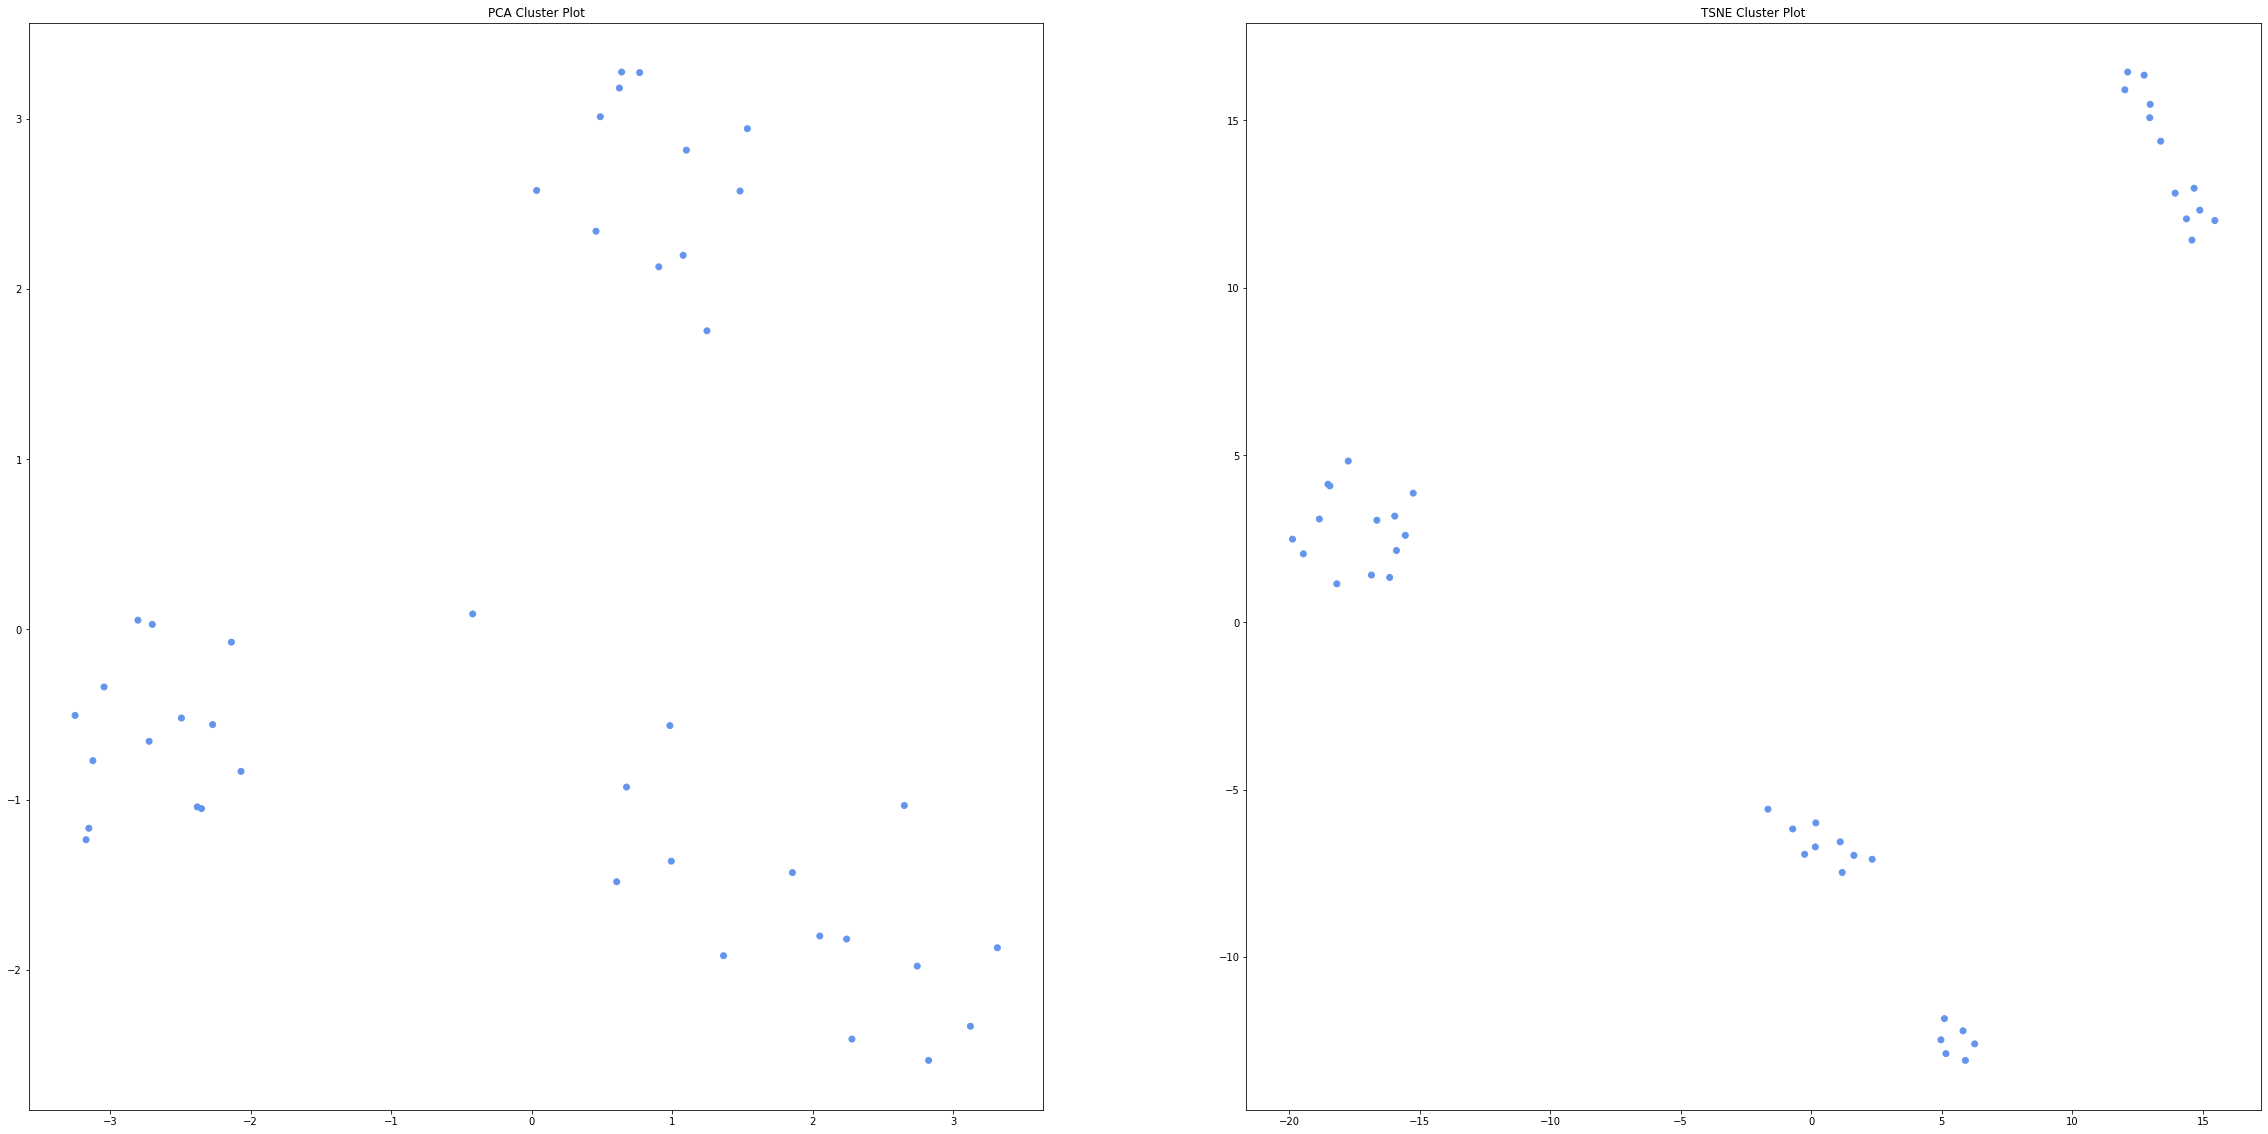

In [9]:
#                  plot
# ============================================================================

X = embed

X_scaled = X

#plot_PCA_nodes(G1, X_scaled, list(G1.nodes), labels = [], annotate = False, random_st=15)

plot_TSNE_PCA_nodes(G1,X_scaled, list(G1.nodes), labels = [], annotate = False, random_st=15)